In [1]:
# Remove the below # to run install all the required packages to execute this project.
# !pip install -r requirements.txt

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('us_acc.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,Fa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
df.describe().transpose

<bound method DataFrame.transpose of            Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
mean   2.137572e+00  3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01   
std    4.787216e-01  5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02   
50%    2.000000e+00  3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01   
75%    2.000000e+00  4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  2.845342e+06  1.101431e+06    2.776068e+06   2.375699e+06   
mean   7.026779e-01  8.089408e+03    6.179356e+01   5.965823e+01   
std    1.560361e+00  1.836009e+04    1.862263e+

In [7]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

<Axes: >

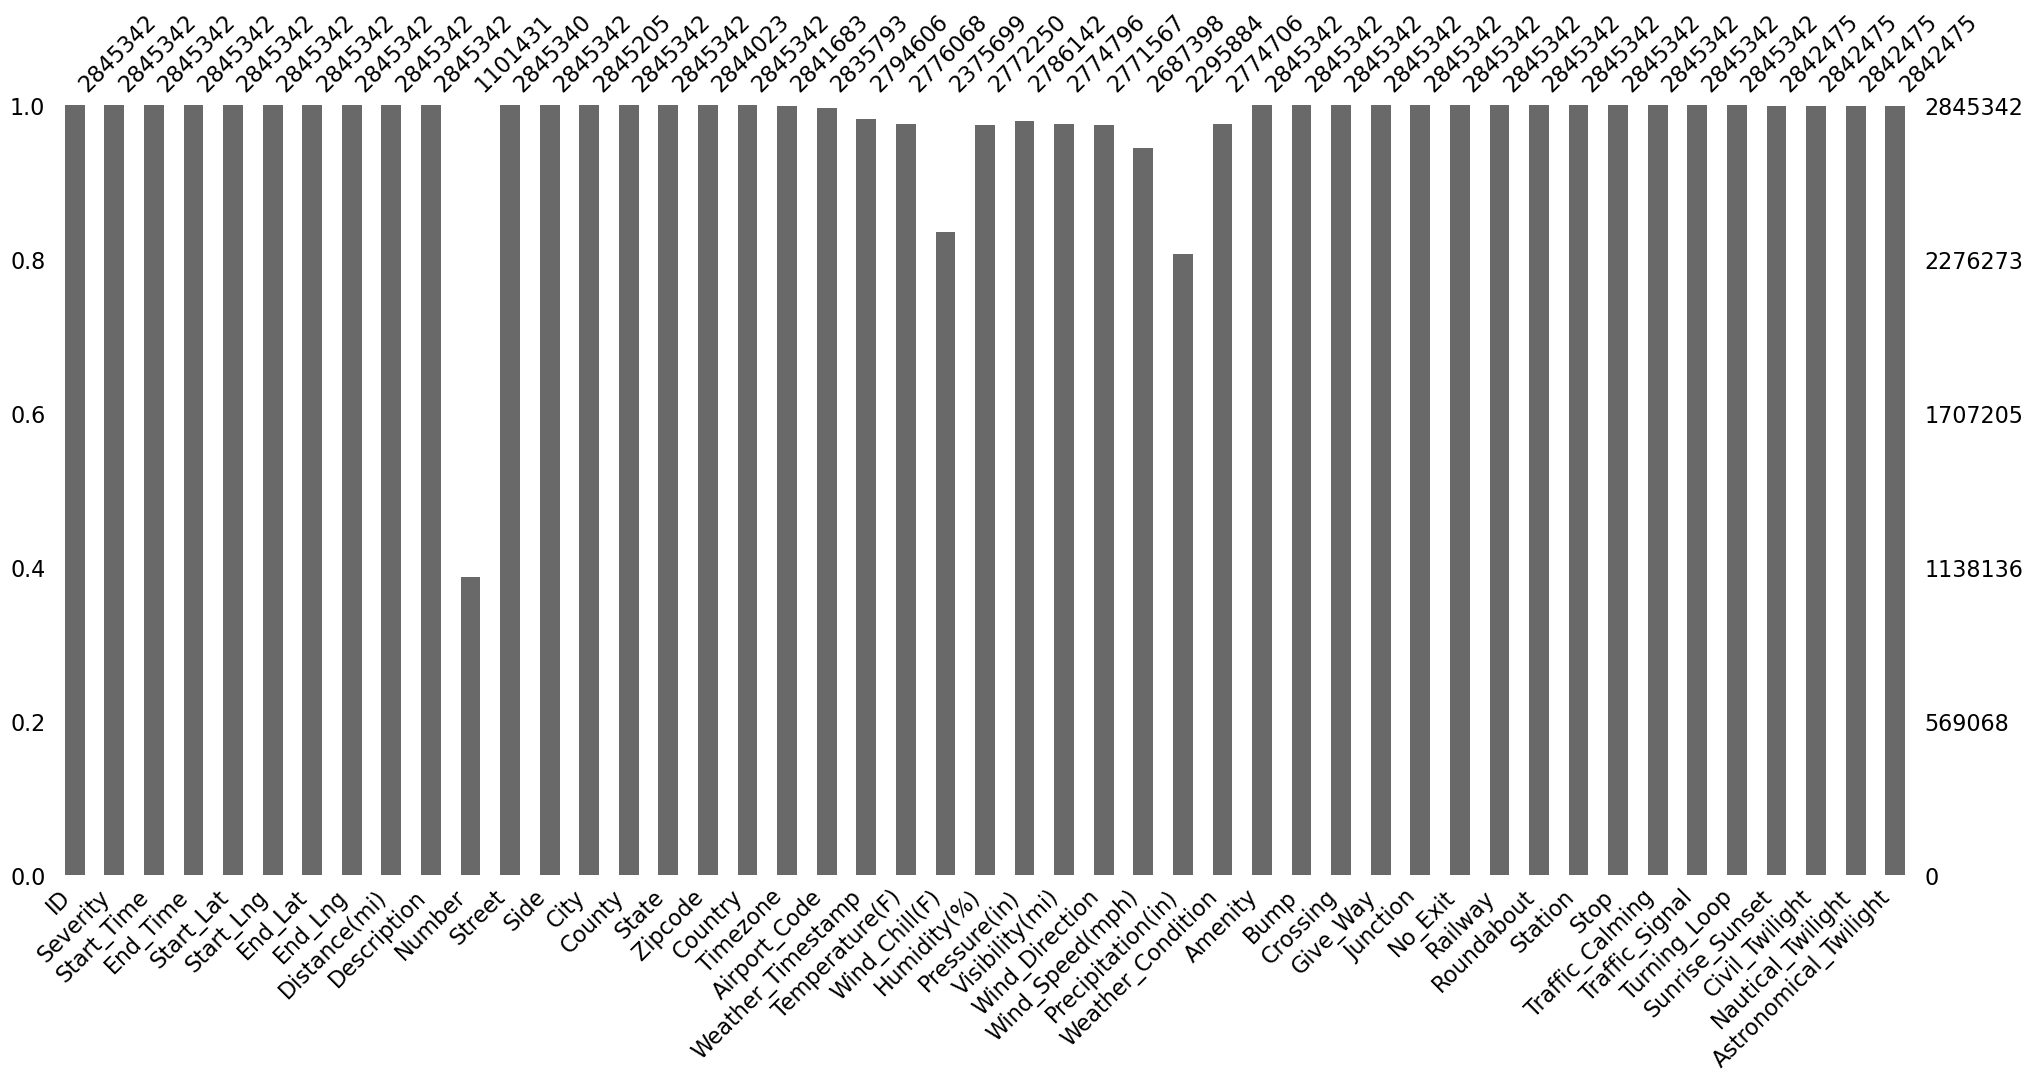

In [8]:
msno.bar(df)

<Axes: >

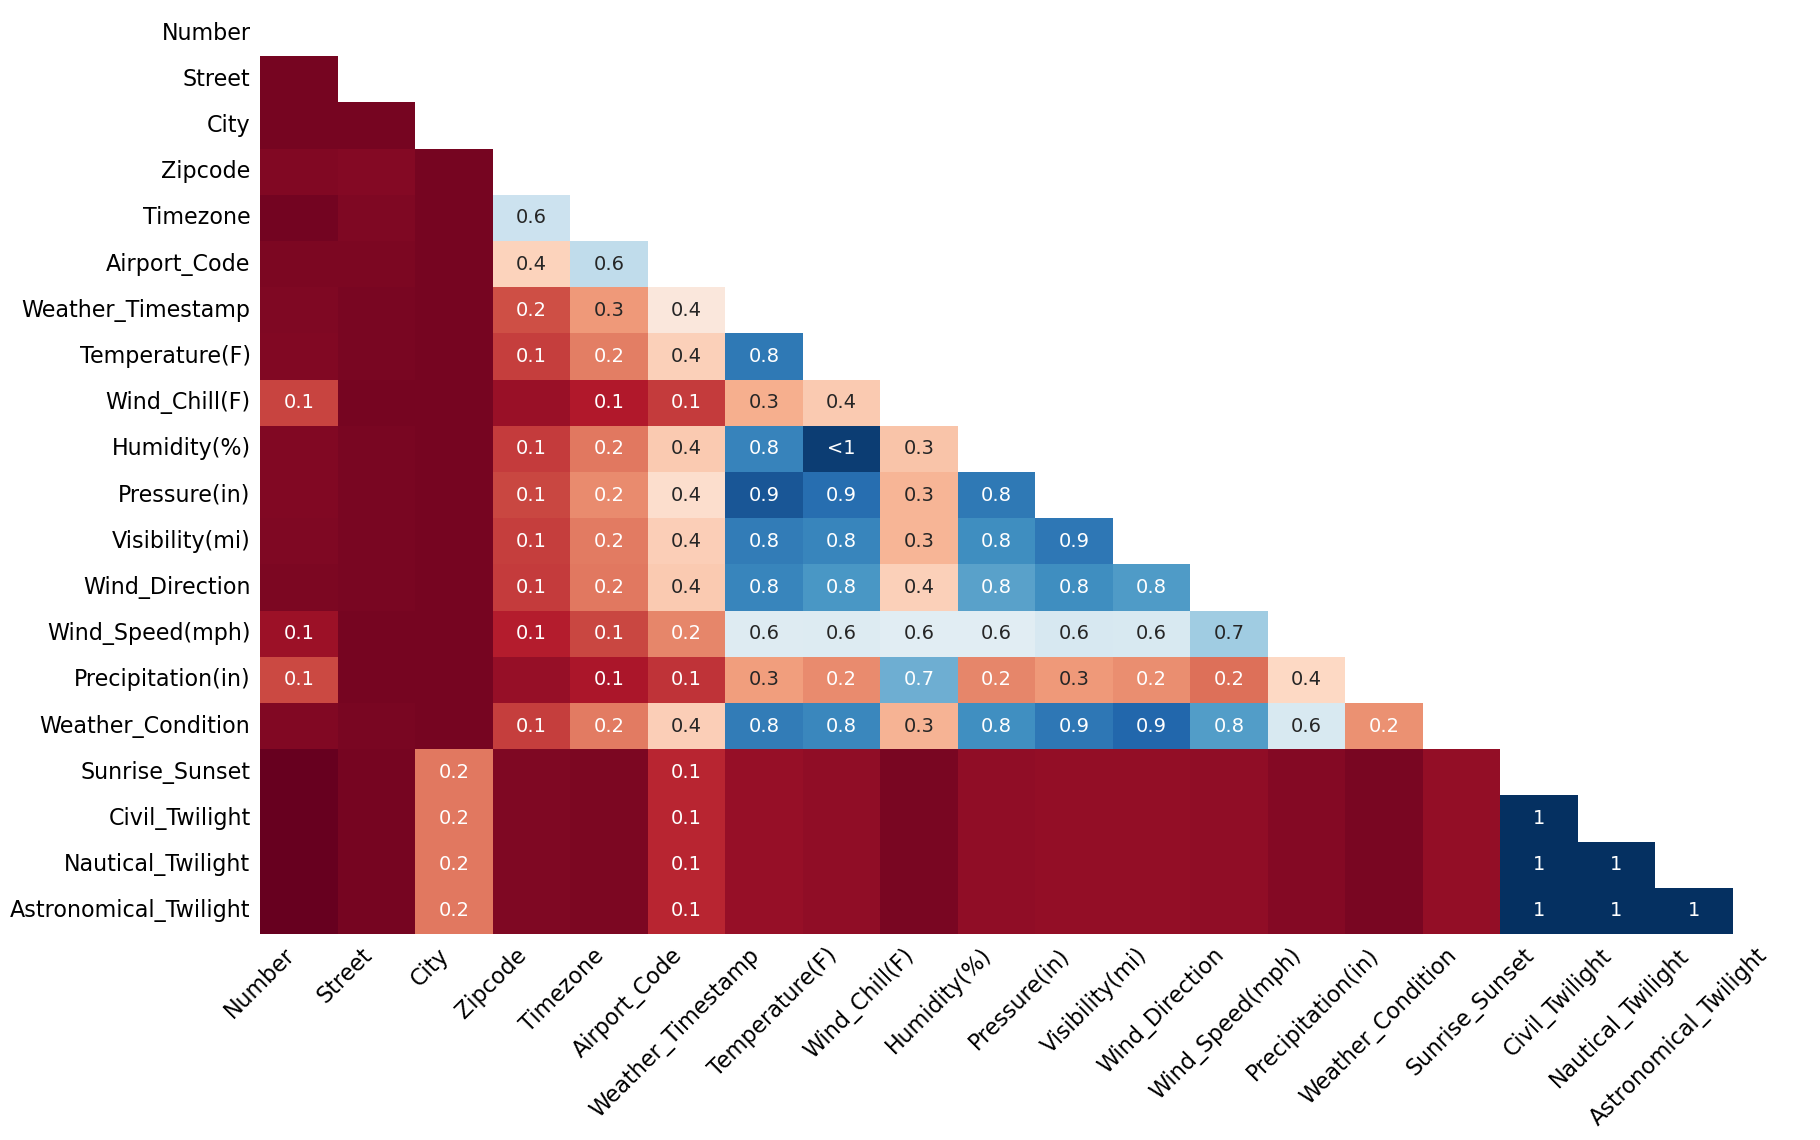

In [9]:
# Gives a heatmap of how missing values are related
msno.heatmap(df)

In [10]:
df['Number'].isnull().sum()

1743911

In [11]:
# Since there are more than half missing vlaues in our Numebr column and the numebr column is not very important as, 
# we can know the street number with description column, we are going to drop that column.
df.drop(['Number'], axis=1, inplace=True)

In [12]:
df = df[df['Street'].isnull() == False]

In [13]:
df.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Street                        0
Side                          0
City                        137
County                        0
State                         0
Zipcode                    1318
Country                       0
Timezone                   3658
Airport_Code               9548
Weather_Timestamp         50735
Temperature(F)            69273
Wind_Chill(F)            469642
Humidity(%)               73091
Pressure(in)              59199
Visibility(mi)            70545
Wind_Direction            73774
Wind_Speed(mph)          157943
Precipitation(in)        549457
Weather_Condition         70635
Amenity                       0
Bump                          0
Crossing

In [14]:
# Deleting the City and Zipcode Null values, I decide to drop these rows as it's unlikely and unfair to make these accidents happen in one city by imputing manually, 
# and I have more than 2.8 million data to do analysis.
# This deletion of missing values should be very strategic as,
# deleting a row/column with modderate amount of missing values and also if that variable is very important for further model building this might result in unbalanced results, 
# So, always deletion of missing values should be made very careful.

df = df[df['Zipcode'].isnull() == False]


In [15]:
df = df[df['City'].isnull() == False]

In [16]:
df.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                   2340
Airport_Code               8230
Weather_Timestamp         49416
Temperature(F)            67952
Wind_Chill(F)            468295
Humidity(%)               71770
Pressure(in)              57877
Visibility(mi)            69222
Wind_Direction            72454
Wind_Speed(mph)          156614
Precipitation(in)        548117
Weather_Condition         69311
Amenity                       0
Bump                          0
Crossing

In [17]:
df['Sunrise_Sunset'].value_counts()

Sunrise_Sunset
Day      1811343
Night    1029841
Name: count, dtype: int64

In [18]:
df[['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']]


,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Night,Night,Night,Night
1,Night,Night,Night,Night
2,Night,Night,Night,Day
3,Night,Night,Day,Day
4,Day,Day,Day,Day
...,...,...,...,...
2845337,Day,Day,Day,Day
2845338,Day,Day,Day,Day
2845339,Day,Day,Day,Day
2845340,Day,Day,Day,Day


In [19]:
df = df[df['Sunrise_Sunset'].isnull() == False]

In [20]:
df.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                   2336
Airport_Code               7726
Weather_Timestamp         48881
Temperature(F)            67399
Wind_Chill(F)            467720
Humidity(%)               71215
Pressure(in)              57329
Visibility(mi)            68628
Wind_Direction            71886
Wind_Speed(mph)          156046
Precipitation(in)        547526
Weather_Condition         68735
Amenity                       0
Bump                          0
Crossing

In [21]:
df[['Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)']]

,Temperature(F),Humidity(%),Wind_Speed(mph)
0,42.1,58.0,10.4
1,36.9,91.0,NaN
2,36.0,97.0,NaN
3,39.0,55.0,NaN
4,37.0,93.0,10.4
...,...,...,...
2845337,86.0,40.0,13.0
2845338,70.0,73.0,6.0
2845339,73.0,64.0,10.0
2845340,71.0,81.0,8.0


C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_8716\4040963167.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df["Temperature(F)"],shade=True)


<Axes: title={'center': '\n Distribution of Accidents Temperatue  \n'}, xlabel='\n Temperature(F) \n', ylabel='\n Density \n'>

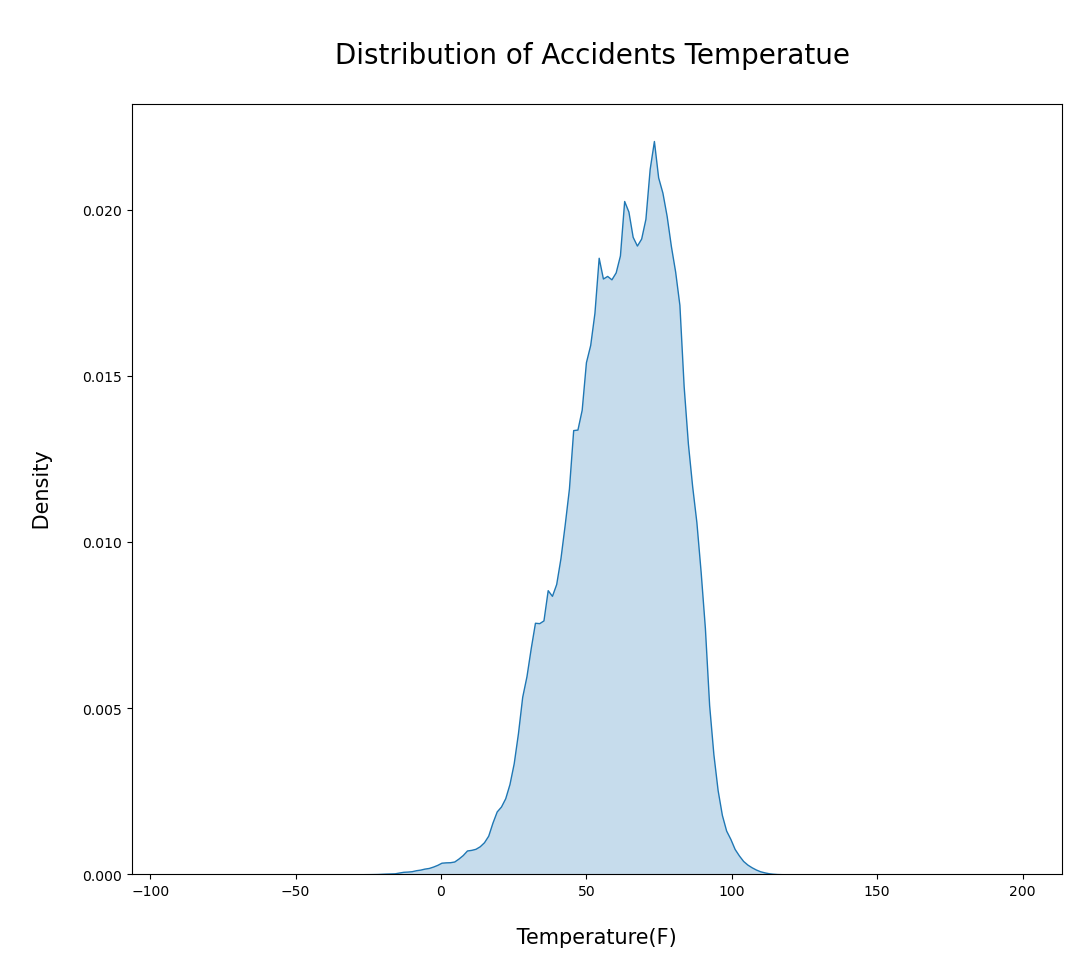

In [22]:
# Imputing the value using Distribution of Temperature data.

plt.figure(figsize = (12,10))
plt.title('\n Distribution of Accidents Temperatue  \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)
sns.kdeplot(data=df["Temperature(F)"],shade=True)

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_8716\2688577027.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df["Visibility(mi)"],shade=True)


<Axes: title={'center': '\n Distribution of Accidents Visibility \n'}, xlabel='\n Visibility(mi)\n', ylabel='\n Density \n'>

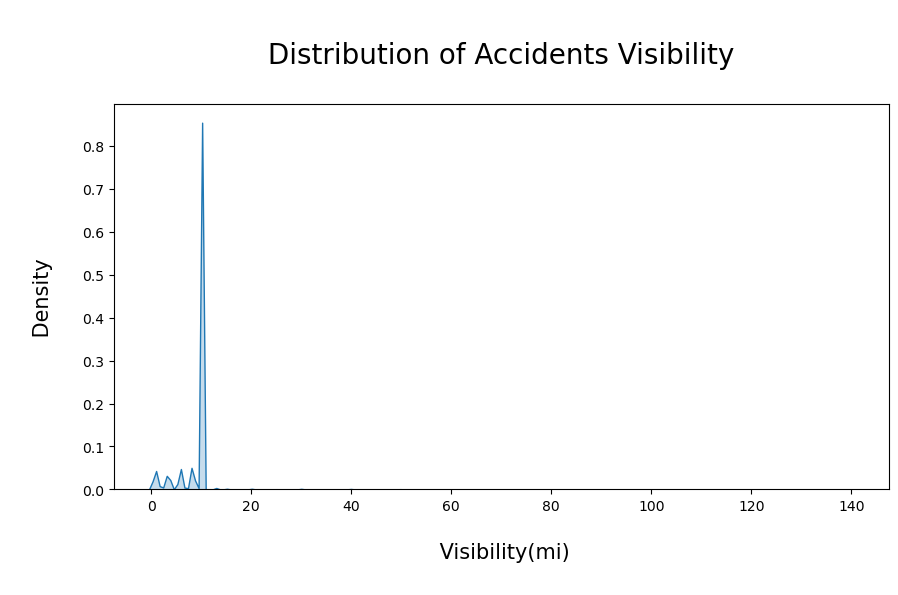

In [23]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Visibility \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Visibility(mi)\n', fontsize=15)
sns.kdeplot(data=df["Visibility(mi)"],shade=True)

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_8716\1278028415.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df["Precipitation(in)"],shade=True)


<Axes: title={'center': '\n Distribution of Accidents Precipitation \n'}, xlabel='\n Precipitation(in) \n', ylabel='\n Density \n'>

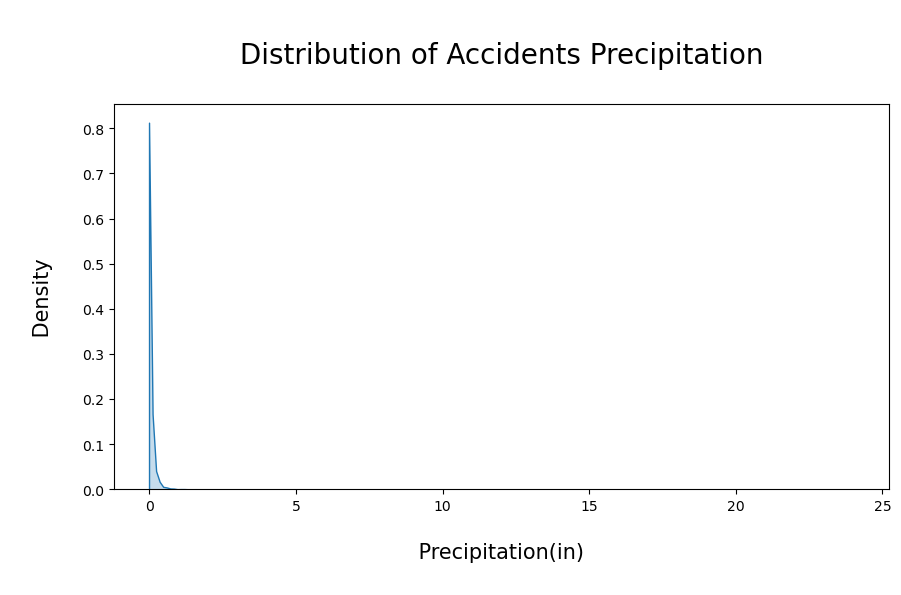

In [24]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Precipitation \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Precipitation(in) \n', fontsize=15)
sns.kdeplot(data=df["Precipitation(in)"],shade=True)

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_8716\1891242867.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df["Humidity(%)"],shade=True)


<Axes: title={'center': '\n Distribution of Accidents Humidity \n'}, xlabel='\n Humidity(%) \n', ylabel='\n Density \n'>

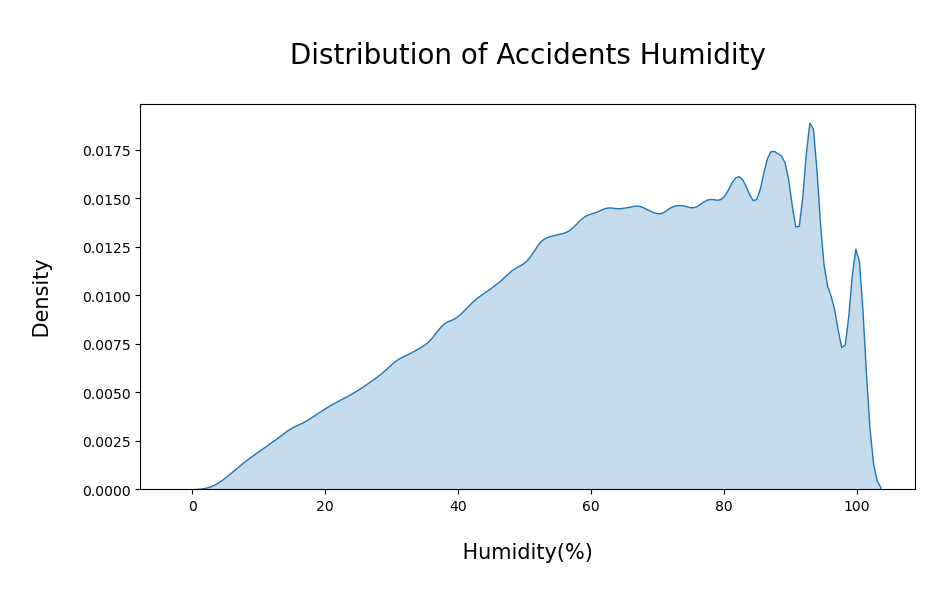

In [25]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Humidity \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Humidity(%) \n', fontsize=15)
sns.kdeplot(data=df["Humidity(%)"],shade=True)

Since temperature has less than 10% null values of the total number of values and they appear to be normally distributed. It might be a good idea to fill these empty data with the mean value. Whereas for Visibility(mi), it's right skewed. So replacing null values with a median value is more suitable.

Since Precipitation(in), Wind_Speed(mph) have an right skewed distribution. It's better to use mode value to fill the Null value in these two columns. Humidity(%) though has a left skwed distribution. I still used the mode value to fill out the Null. It may not be accurate to fill out the Null value based on the previous or latter adjacent value, as every two accidents were hardly related.



In [26]:
df['Temperature(F)']=df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Visibility(mi)']=df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())
df['Precipitation(in)']=df['Precipitation(in)'].fillna(df['Precipitation(in)'].mode()[0])
df['Wind_Speed(mph)']=df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mode()[0])
df['Humidity(%)']=df['Humidity(%)'].fillna(df['Humidity(%)'].mode()[0])

In [27]:
df.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                   2336
Airport_Code               7726
Weather_Timestamp         48881
Temperature(F)                0
Wind_Chill(F)            467720
Humidity(%)                   0
Pressure(in)              57329
Visibility(mi)                0
Wind_Direction            71886
Wind_Speed(mph)               0
Precipitation(in)             0
Weather_Condition         68735
Amenity                       0
Bump                          0
Crossing

In [28]:
# Ignoring the null values, since the total numebr of null values are very less compared to other values.
df = df[df['Timezone'].isnull() == False]

In [29]:
df = df[df['Airport_Code'].isnull() == False]

In [30]:
df.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Airport_Code                  0
Weather_Timestamp         41155
Temperature(F)                0
Wind_Chill(F)            459994
Humidity(%)                   0
Pressure(in)              49603
Visibility(mi)                0
Wind_Direction            64160
Wind_Speed(mph)               0
Precipitation(in)             0
Weather_Condition         61009
Amenity                       0
Bump                          0
Crossing

In [31]:
# Dropping unneccesary columns.
df.drop(['Weather_Timestamp', 'Wind_Chill(F)', 'Pressure(in)'], axis=1, inplace=True)

In [32]:
df.isnull().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance(mi)                 0
Description                  0
Street                       0
Side                         0
City                         0
County                       0
State                        0
Zipcode                      0
Country                      0
Timezone                     0
Airport_Code                 0
Temperature(F)               0
Humidity(%)                  0
Visibility(mi)               0
Wind_Direction           64160
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition        61009
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway 

In [33]:
abc = df.groupby(['Start_Lat', 'Start_Lng', 'Weather_Condition'])['ID'].count().reset_index()

In [34]:
type(abc)

pandas.core.frame.DataFrame

In [35]:
abc

,Start_Lat,Start_Lng,Weather_Condition,ID
0,24.566027,-81.751053,Mostly Cloudy,1
1,24.570087,-81.751491,Fair,1
2,24.570222,-81.751502,Partly Cloudy,1
3,24.570330,-81.751126,Fair,1
4,24.570584,-81.749699,Fair,1
...,...,...,...,...
1729303,48.998445,-111.960841,Mostly Cloudy,3
1729304,48.999510,-116.181110,Overcast,1
1729305,49.000260,-122.735360,Scattered Clouds,1
1729306,49.000560,-122.485030,Scattered Clouds,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2833458 entries, 0 to 2845341
Data columns (total 43 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  Side                   object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Temperature(F)         float64
 20  Humidity(%)            float64
 21  Visibility(mi)         float64
 22  Wind_Direction         

In [37]:
bcd = df[['Start_Lat', 'Start_Lng', 'Weather_Condition']]

In [38]:
df = df[df['Wind_Direction'].isnull() == False]

In [39]:
df = df[df['Weather_Condition'].isnull() == False]

In [40]:
df.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Temperature(F)           0
Humidity(%)              0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
T

In [41]:
df.to_csv('cleaned.csv', index=False)